# Principle Component Analysis of Bike Sharing Dataset

Ref: https://archive-beta.ics.uci.edu/ml/datasets/275

In [1]:
import pandas as pd
import numpy as np
#use widget instead of inline to make the plot interactive
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.rcParams['figure.figsize'] = [9, 6]
font = {'size'   : 9}

plt.rc('font', **font)
# plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
df_day = pd.read_csv('data/day.csv',parse_dates=['dteday'])


In [3]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [5]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


<ipython-input-6-dd3a78245b00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casual['Moving_avg_temp'] = casual.temp.rolling(window=14).mean()
<ipython-input-6-dd3a78245b00>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casual['Moving_avg_casual'] = casual.casual.rolling(window=14).mean()


<AxesSubplot:>

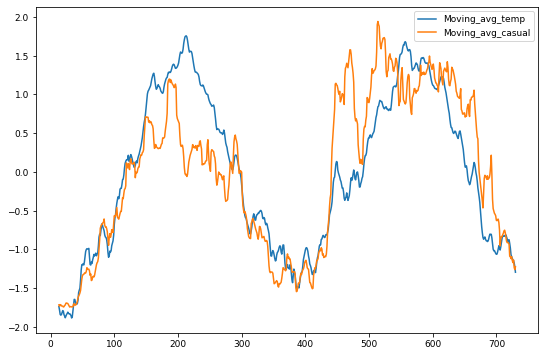

In [6]:
# Temperature Vs Casual riders

casual = df_day[['temp','casual']]
casual['Moving_avg_temp'] = casual.temp.rolling(window=14).mean()
casual['Moving_avg_casual'] = casual.casual.rolling(window=14).mean()
normalized_casual=(casual-casual.mean())/casual.std()
normalized_casual[['Moving_avg_temp','Moving_avg_casual']].plot()

In [7]:
df_day = df_day.join(pd.get_dummies(df_day.season, prefix='season'))
df_day = df_day.join(pd.get_dummies(df_day.yr, prefix='yr'))
df_day = df_day.join(pd.get_dummies(df_day.mnth, prefix='mnth'))
df_day = df_day.join(pd.get_dummies(df_day.holiday, prefix='holiday'))
df_day = df_day.join(pd.get_dummies(df_day.weekday, prefix='weekday'))
df_day = df_day.join(pd.get_dummies(df_day.workingday, prefix='workingday'))
df_day = df_day.join(pd.get_dummies(df_day.weathersit, prefix='weathersit'))
df_day = df_day.drop(['season','yr','mnth','holiday','weekday','workingday','weathersit'], axis=1)

In [8]:
df_day.head()

,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt,season_1,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,1,2011-01-01,0.344167,0.363625,0.805833,0.160446,331,654,985,1,...,0,0,0,0,1,1,0,0,1,0
1,2,2011-01-02,0.363478,0.353739,0.696087,0.248539,131,670,801,1,...,0,0,0,0,0,1,0,0,1,0
2,3,2011-01-03,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1,...,0,0,0,0,0,0,1,1,0,0
3,4,2011-01-04,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1,...,1,0,0,0,0,0,1,1,0,0
4,5,2011-01-05,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1,...,0,1,0,0,0,0,1,1,0,0


In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


pca = PCA(random_state=42)
pca.fit(scale(df_day.drop(['cnt','registered','casual','dteday','instant'],axis=1)))

PCA(random_state=42)

In [10]:
print(f"Number of Principle components: {pca.n_components_}")
print(f"Variance ratio {pca.explained_variance_ratio_}")

Number of Principle components: 36
Variance ratio [1.15763575e-01 8.90966941e-02 7.42021854e-02 6.55919459e-02
 6.02870638e-02 5.80327264e-02 5.52503021e-02 3.61248371e-02
 3.41558708e-02 3.26346160e-02 3.25376933e-02 3.23343195e-02
 3.15459607e-02 3.09230230e-02 3.05025367e-02 3.03071891e-02
 3.01665500e-02 2.97465433e-02 2.90061417e-02 2.75123256e-02
 2.62653410e-02 2.21083277e-02 1.04488223e-02 5.68499483e-03
 5.07659812e-03 2.58943078e-03 1.91686690e-03 1.87519074e-04
 2.28303396e-32 9.85785182e-33 6.98240488e-33 5.43692599e-33
 5.24450431e-33 2.78349429e-33 2.24604005e-33 8.50813386e-34]


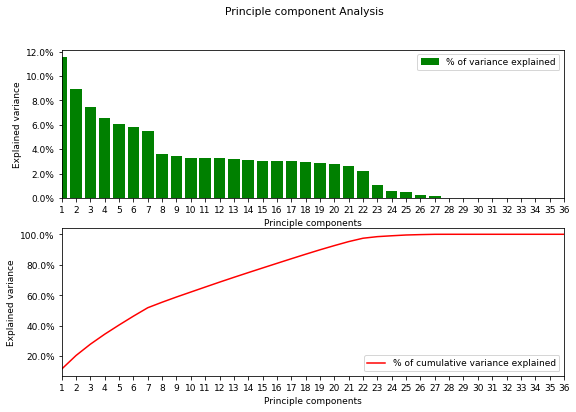

In [11]:
bar_range = pca.n_components_+1



fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

fig.suptitle('Principle component Analysis')


ax1.bar(list(range(1, bar_range)),pca.explained_variance_ratio_,color='g',label="% of variance explained")
ax1.legend(loc='upper right')


ax2.plot(list(range(1, bar_range)), np.cumsum(pca.explained_variance_ratio_), color='r',label="% of cumulative variance explained")
ax2.legend(loc='lower right')

for ax in [ax1,ax2]:
    ax.set_xlim([1,19])
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0,decimals=1))
    ax.set_xlabel('Principle components')
    ax.set_ylabel('Explained variance')
    plt.setp(ax, xticks=[s for s in range(1, bar_range)])
    

plt.show()